In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as spstats

In [32]:
data = pd.read_csv('fcc_2016_coder_survey_subset.csv')
data[['ID.x','EmploymentField','Age','Income']].head(10)

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,finance,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,software development,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,office and administrative support,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,software development,33.0,80000.0
9,265fa78a1fb2409ff5416aec3c4f950d,NaN,33.0,80000.0


In [33]:
income_mean = np.round(np.mean(data['Income']),2)
income_mean


44930.01

Text(100000, 1100, '$\\mu$44930.01')

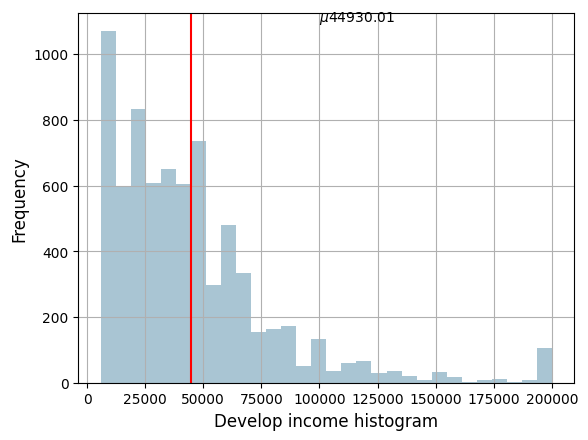

In [34]:
fig, ax = plt.subplots()
data['Income'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_mean, color='r')
ax.set_xlabel("Develop income histogram", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.text(100000,1100, r"$\mu$"+str(income_mean), fontsize=10)

In [35]:
data['Income_log'] = np.log((1+ data[ 'Income']))
data[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]


,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


In [36]:
income_log_mean = np.round(np.mean(data['Income_log']),2)
income_log_mean

10.43

Text(11.5, 450, '$\\mu$=10.43')

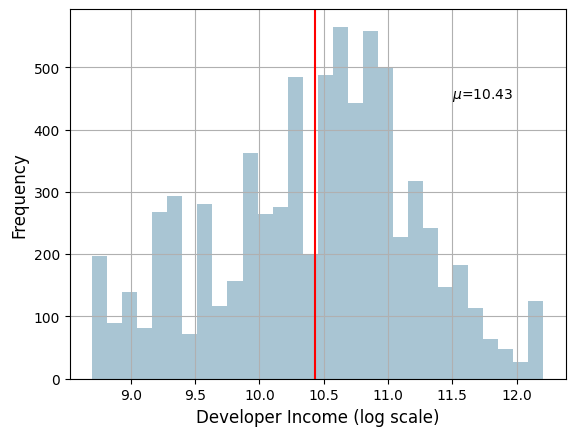

In [37]:
fig, ax = plt.subplots()
data['Income_log'].hist (bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)


In [38]:
# get optimal lambda value from non null income values
#boxcox
income = np.array(data['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print("Optimal lambda value:", opt_lambda)


Optimal lambda value: 0.11799122497648248


In [39]:
data['Income_boxcox_lambda_0'] = spstats.boxcox((1+data['Income']), lmbda=0)
data['Income_boxcox_lambda_opt'] = spstats.boxcox(data[ 'Income'], lmbda=opt_lambda)
data[['ID.x','EmploymentField','Age','Income','Income_boxcox_lambda_0','Income_boxcox_lambda_opt']].iloc[4:9]


,ID.x,EmploymentField,Age,Income,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,finance,34.0,40000.0,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,software development,23.0,32000.0,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,office and administrative support,35.0,40000.0,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,software development,33.0,80000.0,11.289794,23.637128


In [42]:
income_boxcox_mean = np.round(np.mean(data['Income_boxcox_lambda_opt']),2)
income_boxcox_mean


20.65

Text(11.5, 450, '$\\mu$=10.43')

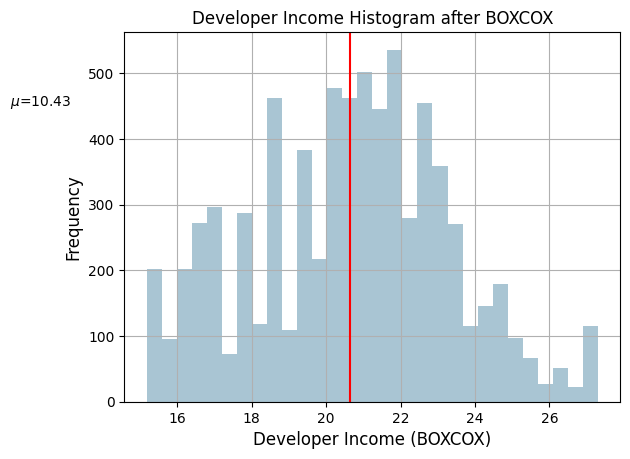

In [43]:
fig, ax = plt.subplots()
data['Income_boxcox_lambda_opt'].hist (bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after BOXCOX', fontsize=12)
ax.set_xlabel('Developer Income (BOXCOX)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)
